# **Install packages and Load Data from MATLAB**

In [1]:
!pip install -q scipy
!pip install -q mne
import scipy.io as sio
import scipy as scipy
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import mne
import pandas as pd

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 32.7 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [26]:
data = scipy.io.loadmat('/content/gdrive/MyDrive/EEG/New/erpCore_erps_example.mat',mdict=None, appendmat=True)

In [27]:
data['erpCore_erpDat_example'].shape

(40, 2, 30, 768)

In [6]:
type(data['erpCore_erpDat_example'])

numpy.ndarray

In [28]:
array_data = data['erpCore_erpDat_example']

In [9]:
array_data.shape

(40, 2, 30, 768)

In [ ]:
avg_eeg.shape

In [ ]:
import pandas as pd
import numpy as np

# Create 40 columns of random data
data = {}
column_names = []
for i in range(array_data.shape[0]):
    for j in range(array_data.shape[1]):
      column_names.append('name_{}_label_{}_'.format(i,j))# You can replace this with your actual data
      #column_names.append(i)
df = pd.DataFrame(columns=column_names)

In [ ]:
for i in range(array_data.shape[0]):
    for j in range(array_data.shape[1]):
      new_array = array_data[i,j]
      np.save('/content/gdrive/MyDrive/EEG/data-np-saved/name_{}_label_{}_'.format(i,j), new_array[:,551:601])
      time_windows = new_array[:,551:601]
      row_means = np.mean(time_windows, axis=1)
      row_max = np.amax(time_windows, axis=1)
      max_indices = np.argmax(time_windows, axis=1)
      df['name_{}_label_{}_'.format(i,j)] =np.concatenate((row_means, row_max), axis=0)


In [ ]:
df #Feature Matrix

In [ ]:
file_path = '/content/gdrive/MyDrive/EEG/Feature_matrix.csv'

# Use the to_csv method to save the DataFrame to a CSV file
df.to_csv(file_path, index=False)

In [ ]:
import pandas as pd

# Load CSV file into a DataFrame
# df = pd.read_csv('/content/gdrive/MyDrive/EEG/Feature_matrix.csv')
df = pd.read_csv('/content/Feature_matrix.csv')


In [ ]:
X = df[:30]

In [ ]:
X = df.T

In [ ]:
X

0         1         2         3         4         5   \
name_0_label_0_  -3.270724 -4.177457 -2.896039 -1.489246 -0.067211  0.164888   
name_0_label_1_  -3.795834 -4.957907 -2.742477 -1.715698  0.388856  0.640706   
name_1_label_0_   4.023280  1.120897  1.854974  0.673576 -0.837985  0.902643   
name_1_label_1_   3.268219  0.989783  2.440612  0.760896  1.318816  0.624576   
name_2_label_0_   1.033985  0.505044  1.199435 -0.241273 -0.416811  0.386806   
...                    ...       ...       ...       ...       ...       ...   
name_37_label_1_ -3.033301 -3.667094 -3.146404 -1.689204 -0.351627 -0.093356   
name_38_label_0_  1.011225  0.565613  1.101486  0.534362 -0.297406  0.617784   
name_38_label_1_  0.205935 -0.120496  0.488077  0.070070  0.293083 -0.074580   
name_39_label_0_  0.450107  0.507354  0.657556  1.179639  0.770267  0.948861   
name_39_label_1_  0.550572  1.038309  0.098426  0.298756  0.858366  0.258979   

                        6         7         8         9   ...    80    81  \
name_0_label_0_   0.689003  1.695906  2.718242  2.196710  ...  24.0   0.0   
name_0_label_1_   1.418531  2.062335  4.063627  2.221670  ...  16.0  13.0   
name_1_label_0_  -2.003495 -1.084485  0.962922 -1.309751  ...   8.0   7.0   
name_1_label_1_  -2.101239 -1.296114  1.292726 -1.891714  ...  20.0  15.0   
name_2_label_0_  -0.189514 -0.405047  0.046410 -1.274650  ...   3.0   5.0   
...                    ...       ...       ...       ...  ...   ...   ...   
name_37_label_1_  0.259260  0.559528  3.243627  1.705570  ...  15.0  35.0   
name_38_label_0_  0.237294 -0.159950 -0.111869 -0.043386  ...  14.0   0.0   
name_38_label_1_  0.229266  0.582884  0.300771 -0.123182  ...  29.0  30.0   
name_39_label_0_  0.218244 -0.318873 -0.745673 -0.924620  ...  32.0   1.0   
name_39_label_1_ -0.371419 -0.977117 -0.826918 -1.490515  ...  29.0   2.0   

                    82    83    84    85    86    87    88    89  
name_0_label_0_   24.0  23.0   4.0  48.0  43.0  39.0  15.0  39.0  
name_0_label_1_   34.0  48.0  40.0  47.0  49.0  46.0   6.0  41.0  
name_1_label_0_    0.0  15.0   0.0  15.0  36.0   0.0   0.0   0.0  
name_1_label_1_    2.0   3.0   9.0   4.0   4.0   3.0  10.0  11.0  
name_2_label_0_    9.0   0.0  26.0  18.0  18.0  19.0  22.0  19.0  
...                ...   ...   ...   ...   ...   ...   ...   ...  
name_37_label_1_   3.0   2.0   0.0  46.0  46.0  46.0  46.0  49.0  
name_38_label_0_  18.0  21.0  20.0  45.0  45.0  46.0   8.0  46.0  
name_38_label_1_  15.0  15.0  16.0  16.0   8.0  36.0  15.0  46.0  
name_39_label_0_   8.0  42.0  43.0  49.0  49.0  48.0  22.0  26.0  
name_39_label_1_   3.0   3.0  36.0  45.0  46.0  40.0  41.0  42.0  

[80 rows x 90 columns]

In [ ]:
Y = [i % 2 for i in range(80)]

In [ ]:
X_train = X[39]

In [ ]:
df

0          1          2          3          4          5   \
0   -3.795834   3.268219   1.429646   0.057006   0.870776   0.919451   
1   -4.957907   0.989783   0.636780  -0.063777   0.449406   1.033323   
2   -2.742477   2.440612   1.438631   0.488441   0.997312   0.733341   
3   -1.715698   0.760896   0.520913  -0.310527   0.411258   0.882614   
4    0.388856   1.318816   0.059755  -0.583893  -0.527732   0.593176   
..        ...        ...        ...        ...        ...        ...   
85  47.000000   4.000000   0.000000  49.000000  26.000000  47.000000   
86  49.000000   4.000000  27.000000  42.000000  26.000000  48.000000   
87  46.000000   3.000000  28.000000  34.000000  25.000000  30.000000   
88   6.000000  10.000000  28.000000  49.000000   5.000000  29.000000   
89  41.000000  11.000000  28.000000  34.000000  47.000000  18.000000   

           6          7          8          9   ...         30         31  \
0    1.030589   0.866052  -3.485994   2.261817  ...   0.336447   1.834023   
1   -0.001481   0.936248  -4.390191   1.885216  ...   0.786680   0.886821   
2   -0.188959   0.888085  -3.516406   1.993734  ...  -0.157468   1.732097   
3    1.406406   0.558436  -1.255501   0.705783  ...   1.534175   0.406125   
4    0.537956   0.171457   0.309801   0.687646  ...   1.199188   0.099571   
..        ...        ...        ...        ...  ...        ...        ...   
85  48.000000  35.000000  38.000000  47.000000  ...  20.000000  48.000000   
86   0.000000  34.000000  38.000000  47.000000  ...  17.000000  28.000000   
87  48.000000  33.000000  39.000000  15.000000  ...  17.000000  49.000000   
88  47.000000  33.000000  40.000000  12.000000  ...  18.000000  10.000000   
89  47.000000  32.000000  40.000000  14.000000  ...  19.000000   9.000000   

           32         33         34         35         36         37  \
0    2.535117  -2.416999   0.944437   0.582156   4.684806  -3.033301   
1    2.470139  -0.475476   1.422895   0.973554   3.646416  -3.667094   
2    2.936950   0.102631   1.563454   0.361440   4.054898  -3.146404   
3    1.457590  -0.584142   1.236412   0.617614   2.287016  -1.689204   
4   -0.406864  -1.608901   0.293433   0.068426   0.548688  -0.351627   
..        ...        ...        ...        ...        ...        ...   
85  31.000000  36.000000  46.000000  22.000000  19.000000  46.000000   
86  14.000000  36.000000  46.000000  49.000000  20.000000  46.000000   
87  15.000000  36.000000  42.000000   0.000000  19.000000  46.000000   
88  14.000000  21.000000   0.000000   2.000000   0.000000  46.000000   
89  10.000000  46.000000   4.000000   0.000000   0.000000  49.000000   

           38         39  
0    0.205935   0.550572  
1   -0.120496   1.038309  
2    0.488077   0.098426  
3    0.070070   0.298756  
4    0.293083   0.858366  
..        ...        ...  
85  16.000000  45.000000  
86   8.000000  46.000000  
87  36.000000  40.000000  
88  15.000000  41.000000  
89  46.000000  42.000000  

[90 rows x 40 columns]

In [ ]:
X = df.T

In [ ]:
X.shape

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import svm
import numpy as np

X = df.T
# = np.array([0 if i.find("label_1")==-1 else 1 for i in X.index])
#user = np.array([int(i.split("_label")[0].split("name_")[1]) for i in X.index])
X_train = X[0:70]
X_test = X[71:80]
Y_train = Y[0:70]
Y_test = Y[71:80]
clf = svm.SVC()
#X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
clf.fit(X_train, Y_train)
# y_pred = clf.predict(X_test)
# acc = accuracy_score(y_test, y_pred)
acc = clf.score(X_test, Y_test)
print(f"accuracy:{acc*100} %")

In [ ]:
# Import the SVC (Support Vector Classifier) from sklearn's svm module
from sklearn.svm import SVC
X_train = X[0:70]
X_test = X[71:80]
Y_train = Y[0:70]
Y_test = Y[71:80]
# Create an instance of SVC with the RBF kernel
# The 'gamma' parameter can be tuned; 'scale' is often a good default choice
clf = SVC(kernel='poly', degree=3)

# Fit the SVM model on the training data
# X_train and y_train need to be defined as your training data and labels
clf.fit(X_train, Y_train)

# Use the trained model to make predictions on the test data
# X_test is your test data for which you want predictions
predictions = clf.predict(X_test)
acc = clf.score(X_test, Y_test)
print(f"accuracy:{acc*100} %")

accuracy:55.55555555555556 %


In [ ]:
X = df
# = np.array([0 if i.find("label_1")==-1 else 1 for i in X.index])
#user = np.array([int(i.split("_label")[0].split("name_")[1]) for i in X.index])
X_train = X[0:10]

In [ ]:
X_train

name_0_label_0_  name_0_label_1_  name_1_label_0_  name_1_label_1_  \
0         0.450107         0.550572         0.450107         0.550572   
1         0.507354         1.038309         0.507354         1.038309   
2         0.657556         0.098426         0.657556         0.098426   
3         1.179639         0.298756         1.179639         0.298756   
4         0.770267         0.858366         0.770267         0.858366   
5         0.948861         0.258979         0.948861         0.258979   
6         0.218244        -0.371419         0.218244        -0.371419   
7        -0.318873        -0.977117        -0.318873        -0.977117   
8        -0.745673        -0.826918        -0.745673        -0.826918   
9        -0.924620        -1.490515        -0.924620        -1.490515   

   name_2_label_0_  name_2_label_1_  name_3_label_0_  name_3_label_1_  \
0         0.450107         0.550572         0.450107         0.550572   
1         0.507354         1.038309         0.507354         1.038309   
2         0.657556         0.098426         0.657556         0.098426   
3         1.179639         0.298756         1.179639         0.298756   
4         0.770267         0.858366         0.770267         0.858366   
5         0.948861         0.258979         0.948861         0.258979   
6         0.218244        -0.371419         0.218244        -0.371419   
7        -0.318873        -0.977117        -0.318873        -0.977117   
8        -0.745673        -0.826918        -0.745673        -0.826918   
9        -0.924620        -1.490515        -0.924620        -1.490515   

   name_4_label_0_  name_4_label_1_  ...  name_35_label_0_  name_35_label_1_  \
0         0.450107         0.550572  ...          0.450107          0.550572   
1         0.507354         1.038309  ...          0.507354          1.038309   
2         0.657556         0.098426  ...          0.657556          0.098426   
3         1.179639         0.298756  ...          1.179639          0.298756   
4         0.770267         0.858366  ...          0.770267          0.858366   
5         0.948861         0.258979  ...          0.948861          0.258979   
6         0.218244        -0.371419  ...          0.218244         -0.371419   
7        -0.318873        -0.977117  ...         -0.318873         -0.977117   
8        -0.745673        -0.826918  ...         -0.745673         -0.826918   
9        -0.924620        -1.490515  ...         -0.924620         -1.490515   

   name_36_label_0_  name_36_label_1_  name_37_label_0_  name_37_label_1_  \
0          0.450107          0.550572          0.450107          0.550572   
1          0.507354          1.038309          0.507354          1.038309   
2          0.657556          0.098426          0.657556          0.098426   
3          1.179639          0.298756          1.179639          0.298756   
4          0.770267          0.858366          0.770267          0.858366   
5          0.948861          0.258979          0.948861          0.258979   
6          0.218244         -0.371419          0.218244         -0.371419   
7         -0.318873         -0.977117         -0.318873         -0.977117   
8         -0.745673         -0.826918         -0.745673         -0.826918   
9         -0.924620         -1.490515         -0.924620         -1.490515   

   name_38_label_0_  name_38_label_1_  name_39_label_0_  name_39_label_1_  
0          0.450107          0.550572          0.450107          0.550572  
1          0.507354          1.038309          0.507354          1.038309  
2          0.657556          0.098426          0.657556          0.098426  
3          1.179639          0.298756          1.179639          0.298756  
4          0.770267          0.858366          0.770267          0.858366  
5          0.948861          0.258979          0.948861          0.258979  
6          0.218244         -0.371419          0.218244         -0.371419  
7         -0.318873         -0.977117         -0.318873   

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import svm
import numpy as np
X = df.T
y = [0 if i.find("label_1")==-1 else 1 for i in X.index]
X = X.values
scaler = MinMaxScaler().fit_transform(X)

clf = svm.SVC()
scores = cross_val_score(clf, X, y, cv=3)
print(scores)
print(f"accuracy:{np.mean(scores)*100} %")

[0.44444444 0.55555556 0.57692308]
accuracy:52.56410256410257 %


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler

X = MinMaxScaler().fit_transform(X)

clf = MLPClassifier(hidden_layer_sizes=[200,100,50])

scores = cross_val_score(clf, X, y, cv=5)
print(scores)
print(f"accuracy:{np.mean(scores)*100} %")




[0.4375 0.5    0.5    0.75   0.5   ]
accuracy:53.75 %


**Calculating Time Window 150 until 200**

In [ ]:
d =  np.load('/content/gdrive/MyDrive/EEG/data-np-saved/name_0_label_0_.npy', encoding='bytes')

 **MLP**

In [ ]:
import numpy as np

# Activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Initialize parameters
input_size = 90  # Size of the input vector
hidden_size = 45  # Number of neurons in the hidden layer
output_size = 1  # Size of the output

# Weights and biases
W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))

# Forward propagation
def forward_propagation(X):
    Z1 = np.dot(X, W1) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = sigmoid(Z2)
    return A2

# Backward propagation and parameter update
def train(X, y, epochs, learning_rate):
    global W1, b1, W2, b2

    for epoch in range(epochs):
        # Forward pass
        A2 = forward_propagation(X)

        # Compute loss (assuming binary cross-entropy loss)
        cost = -(y * np.log(A2) + (1 - y) * np.log(1 - A2)).mean()

        # Backward pass
        dZ2 = A2 - y
        dW2 = np.dot(A1.T, dZ2)
        db2 = np.sum(dZ2, axis=0, keepdims=True)

        dZ1 = np.dot(dZ2, W2.T) * sigmoid_derivative(A1)
        dW1 = np.dot(X.T, dZ1)
        db1 = np.sum(dZ1, axis=0)

        # Update parameters
        W2 -= learning_rate * dW2
        b2 -= learning_rate * db2
        W1 -= learning_rate * dW1
        b1 -= learning_rate * db1

        if epoch % 100 == 0:
            print(f'Epoch {epoch}, Loss: {cost}')

# Example usage
#X = np.array([[0.1, 0.2, 0.3, 0.4], [0.5, 0.6, 0.7, 0.8]])  # Sample input
#y = np.array([[1], [0]])  # Sample output

train(X[0], Y[0], epochs=1000, learning_rate=0.01)

# **Classifier**

In [ ]:
import mne
dat = list(data.items())
np_arr = np.array(dat)

np_arr = np.array(mat_data['EEG']['data'])
np_arr=np_arr.reshape(30,768,633) #(99,64,640)

raw = mne.EpochsArray(np_arr,info)

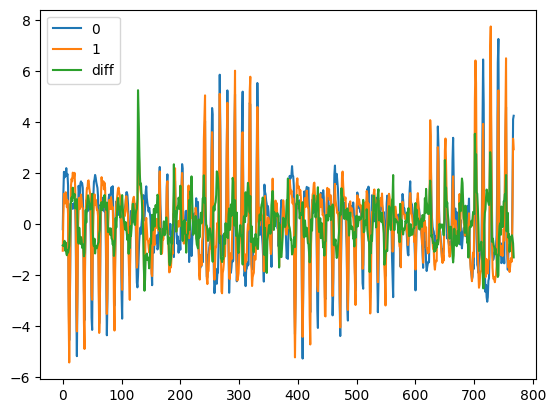

In [ ]:
import numpy as np
sub_0 = np.mean(b[0][0].reshape(768,30),axis=1)
sub_1 = np.mean(b[0][1].reshape(768,30),axis=1)
plt.plot(sub_0, label="0" )
plt.plot(sub_1, label="1" )
plt.plot(sub_1-sub_0, label="diff")
plt.legend()
plt.show()

Train Classifier

In [ ]:
Data = pd.DataFrame([])
list_data = []
list_labels =[]
for i in range(0,len(a['subjects'])):
  for j in range(0,2):
    list_labels.append(j)
    for k in range(0,30):
        for l in range(0,768):
          c = b[i,j,k,l]
          list_data.append(c)
    #print(len(list_data))
    Data['sub'+str(i)+'_'+str(j)] = list_data
    list_data = []

Data is a data frame of EEG signals and list labels contains labels

In [ ]:
from matplotlib import pyplot as plt
Data['sub0_1'].plot(kind='line', figsize=(8, 4))
plt.show()
Data['sub0_0'].plot(kind='line', figsize=(8, 4),)
plt.gca().spines[['top', 'right']].set_visible(True)

In [ ]:
import torch.optim as optim
# Define a simple MLP class
class SimpleMLP(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(SimpleMLP, self).__init__()
        self.fc1 = nn.Linear(input_dim, 500)
        self.fc2 = nn.Linear(500, 500)
        self.fc3 = nn.Linear(500, 20)
        self.relu1 = nn.ReLU()
        self.relu2 = nn.ReLU()

    def forward(self, x):
        x = self.relu1(self.fc1(x))
        x = self.relu2(self.fc2(x))
        x = F.sigmoid(self.fc3(x))
        return x

In [ ]:
tensor_input = torch.tensor(Data['sub0_0'], dtype = torch.float32)
# tensor_input.dtype
tensor_output = torch.tensor(list_labels, dtype = torch.float32)

In [ ]:
from torch.utils.data import TensorDataset, DataLoader
data_set = TensorDataset(tensor_input, tensor_output)

In [ ]:
data_loader = DataLoader(data_set, batch_size = 4, shuffle = True)

In [ ]:
input_dim = 9816  # Example input dimension
hidden_dim = 500  # Example hidden layer dimension
output_dim = 20  # Example output dimension
model = SimpleMLP(input_dim, hidden_dim, output_dim)

In [ ]:
criterion = nn.BCELoss()  # Example loss function
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Example optimizer

In [ ]:
for i in range(20):
  for x,y in data_loader:
    optimizer.zero_grad()
    output = model(x)
    loss = criterion(output, y)
    loss.backward()
    optimizer.step()
  print(i)

In [ ]:
# Example usage
if __name__ == "__main__":
    # Set up the dimensions
    input_dim = 10  # Example input dimension
    hidden_dim = 20  # Example hidden layer dimension
    output_dim = 5  # Example output dimension

    # Create an instance of the SimpleMLP
    model = SimpleMLP(input_dim, hidden_dim, output_dim)

    # Create some dummy input data (replace this with your actual data)
    input_data = torch.randn(32, input_dim)  # Example batch size 32

    # Forward pass
    output = model(input_data)

    # Print the output shape
    print("Output shape:", output.shape)

    # Define a loss function and an optimizer
    criterion = nn.MSELoss()  # Example loss function
    optimizer = optim.SGD(model.parameters(), lr=0.01)  # Example optimizer

    # Example usage with a forward pass, loss calculation, and backpropagation
    target = torch.randn(32, output_dim)  # Example target tensor
    optimizer.zero_grad()
    output = model(input_data)
    loss = criterion(output, target)
    loss.backward()
    optimizer.step()


In [ ]:
# !pip install -q scipy
# !pip install  mne
# import scipy.io as sio
# import scipy as scipy
# import pandas as pd
# import torch
# import torch.nn as nn
# import torch.nn.functional as F
import os
import matplotlib.pyplot as plt
import numpy as np
import mne

# sample_data_folder = mne.datasets.sample.data_path()
# sample_data_raw_file = (
#     sample_data_folder / "MEG" / "sample" / "sample_audvis_filt-0-40_raw.fif"
# )
# raw = mne.io.read_raw_fif(sample_data_raw_file)

In [ ]:
# !pip install mne
import mne
import numpy as np
import matplotlib.pyplot as plt

raw = mne.read_epochs_eeglab("/content/1_N170_processed_data.set")
data = scipy.io.loadmat('/content/er.mat',mdict=None, appendmat=True)


Extracting parameters from /content/1_N170_processed_data.set...
Not setting metadata
633 matching events found
No baseline correction applied
0 projection items activated
Ready.


<ipython-input-3-6a9c2cb39047>:6: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  raw = mne.read_epochs_eeglab("/content/1_N170_processed_data.set")


In [ ]:
cond_0 = data["erpCore_erpDat_example"][:,0,:,:]
cond_1 = data["erpCore_erpDat_example"][:,1,:,:]

r_cond_0 = mne.EpochsArray(cond_0,raw.info)
r_cond_1 = mne.EpochsArray(cond_1,raw.info)


Not setting metadata
40 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
40 matching events found
No baseline correction applied
0 projection items activated


    Using multitaper spectrum estimation with 7 DPSS windows


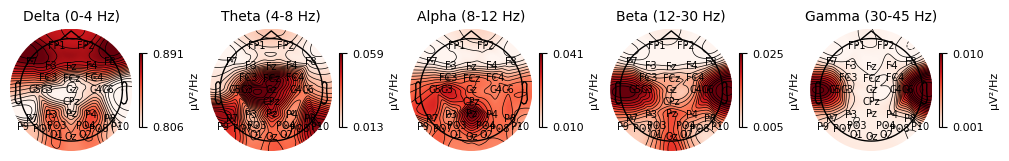

    Using multitaper spectrum estimation with 7 DPSS windows


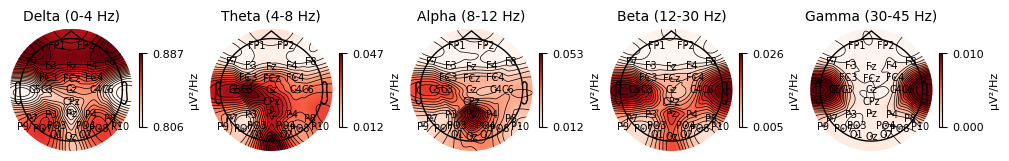

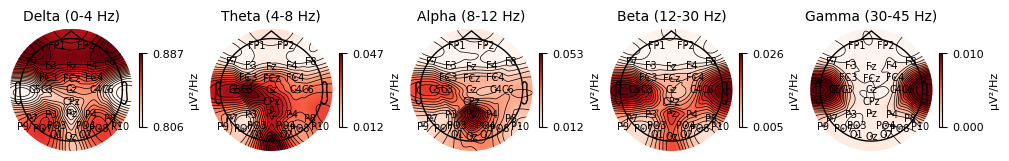

In [ ]:
r_cond_0.compute_psd().plot_topomap(normalize=True, show_names= True, contours=20, res=512, size = 8)
r_cond_1.compute_psd().plot_topomap(normalize=True, show_names= True, contours=20, res=512, size = 8)


Not setting metadata
40 matching events found
No baseline correction applied
0 projection items activated
combining channels using "gfp"


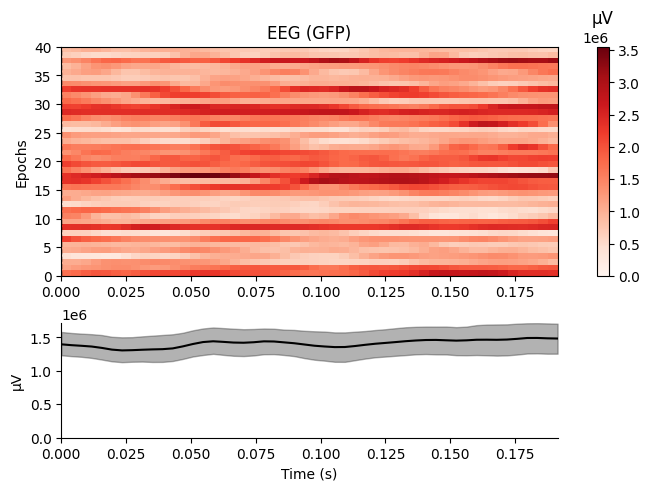

Not setting metadata
40 matching events found
No baseline correction applied
0 projection items activated
combining channels using "gfp"


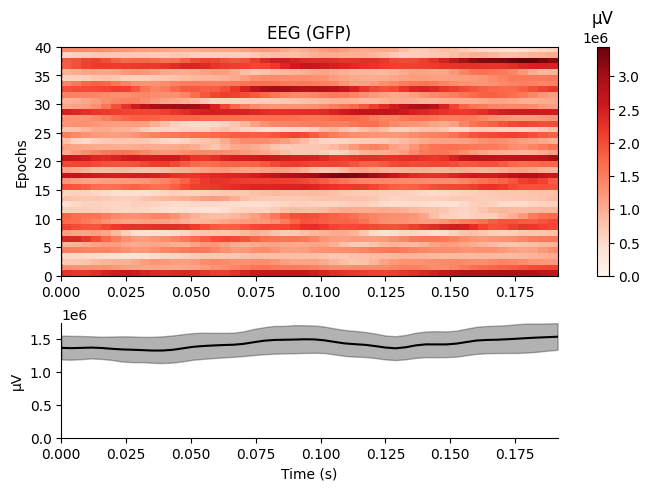

[<Figure size 640x480 with 3 Axes>]

In [ ]:
r_cond_0.plot_image()
r_cond_1.plot_image()

In [ ]:

cond_0 = data["erpCore_erpDat_example"][:,0,:,:]
cond_1 = data["erpCore_erpDat_example"][:,1,:,:]

cond_0 = np.mean(cond_0, axis=0)
cond_1 = np.mean(cond_1, axis=0)

raw_cond_0 = mne.io.RawArray(cond_0, raw.info)
raw_cond_1 = mne.io.RawArray(cond_1,raw.info)




Creating RawArray with float64 data, n_channels=30, n_times=768
    Range : 0 ... 767 =      0.000 ...     2.996 secs
Ready.
Creating RawArray with float64 data, n_channels=30, n_times=768
    Range : 0 ... 767 =      0.000 ...     2.996 secs
Ready.


Effective window size : 3.000 (s)


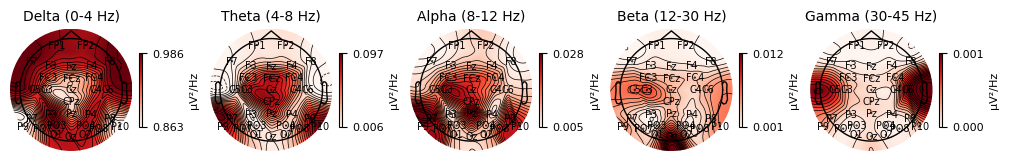

Effective window size : 3.000 (s)


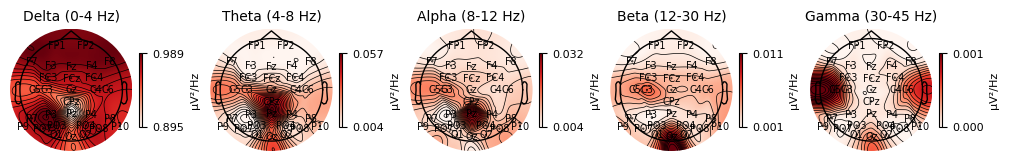

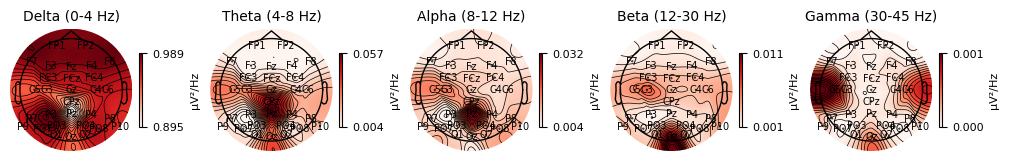

In [ ]:
# raw_cond_0.plot_psd_topomap()
# raw_cond_0.plot()

raw_cond_0.compute_psd().plot_topomap(normalize=True, show_names= True, contours=20, res=512, size=8)
raw_cond_1.compute_psd().plot_topomap(normalize=True, show_names= True, contours=20, res=512, size=8)

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 0.195 (s)
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 0.195 (s)


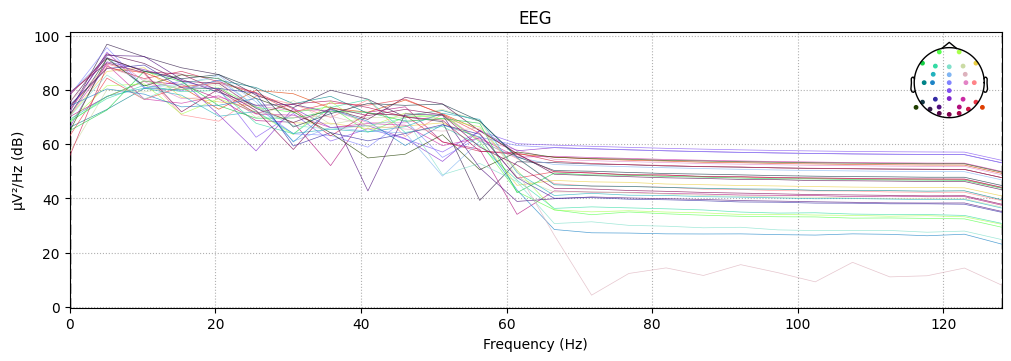

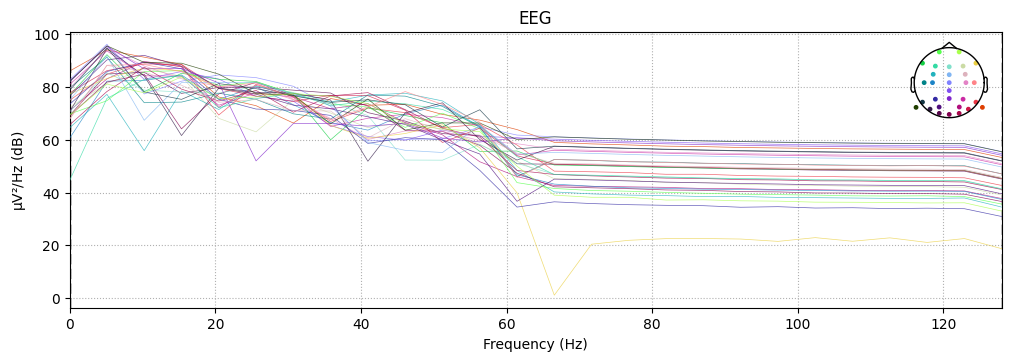

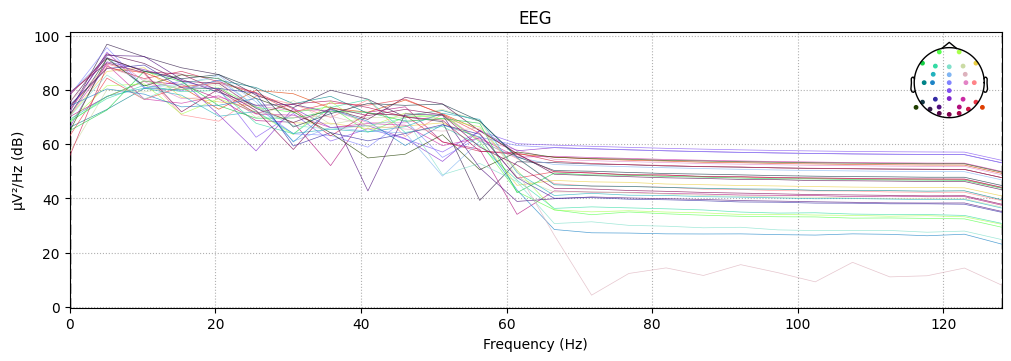

In [ ]:
raw_cond_0.plot_psd()
raw_cond_1.plot_psd()
# raw_cond_0.compute_psd().plot(picks="data")
# raw_cond_1.compute_psd().plot(picks="data")


    Using multitaper spectrum estimation with 7 DPSS windows
Averaging across epochs...
Using matplotlib as 2D backend.


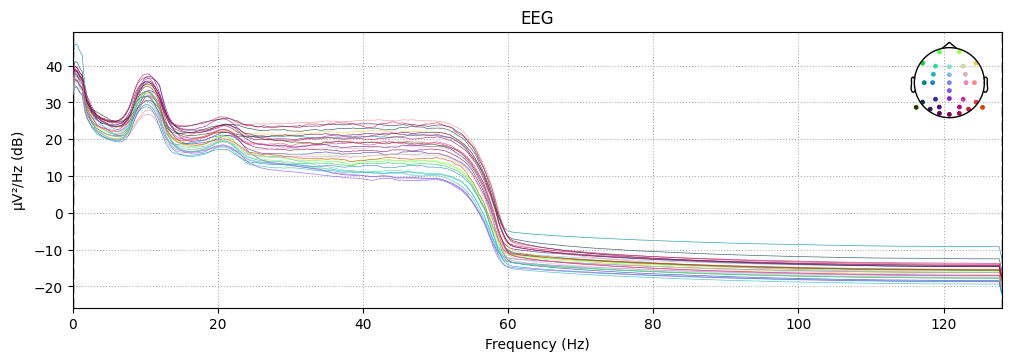

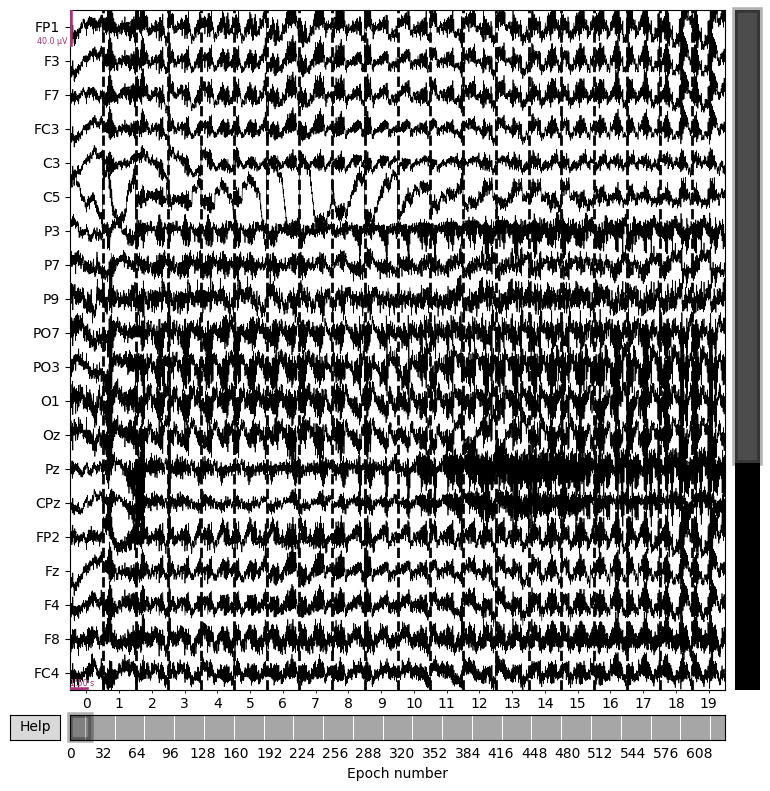

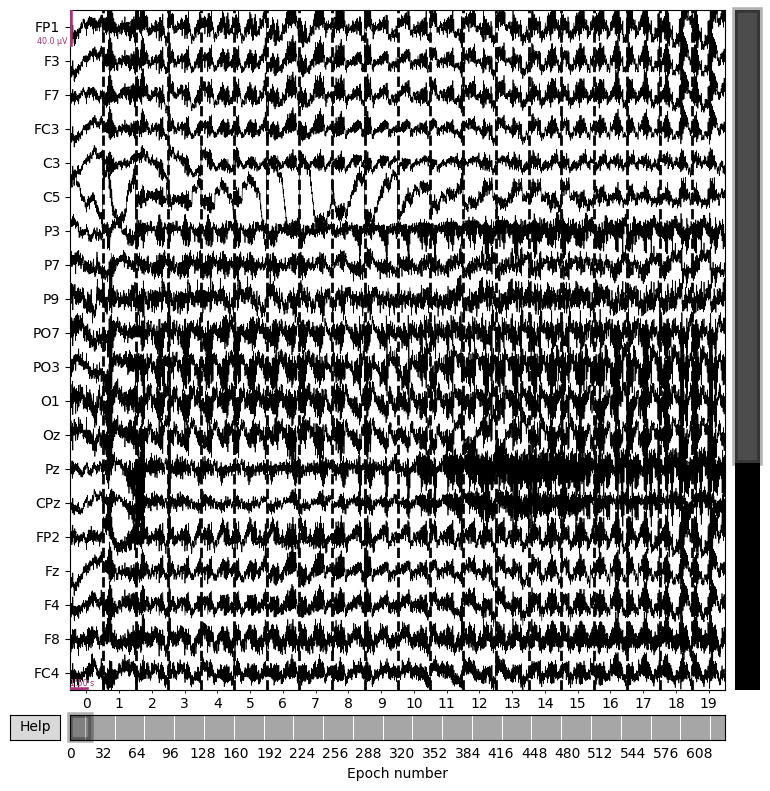

In [ ]:
# raw.compute_psd(fmax=50).plot(picks="data", exclude="bads")
raw.compute_psd().plot(picks="data")
raw.plot()


Fitting ICA to data using 30 channels (please be patient, this may take a while)


<ipython-input-14-aa77dd0b6761>:3: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 20 components
Fitting ICA took 26.0s.
    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
633 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
633 matching events found
No baseline correction applied
0 projection items activated


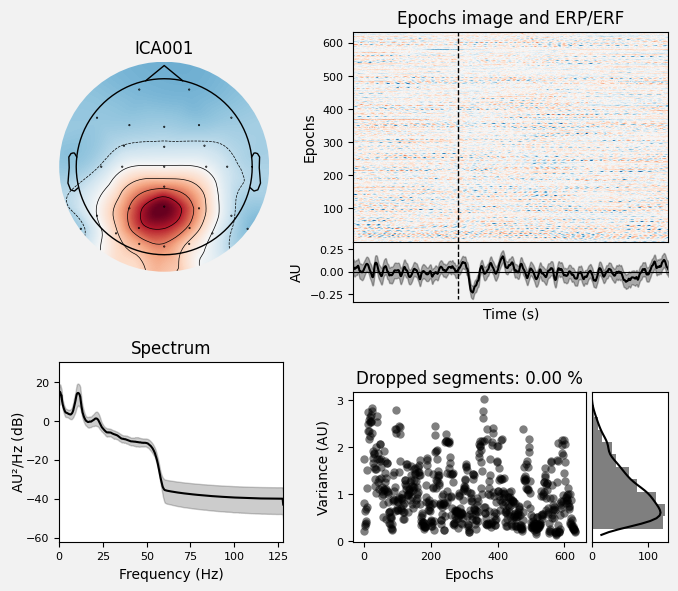

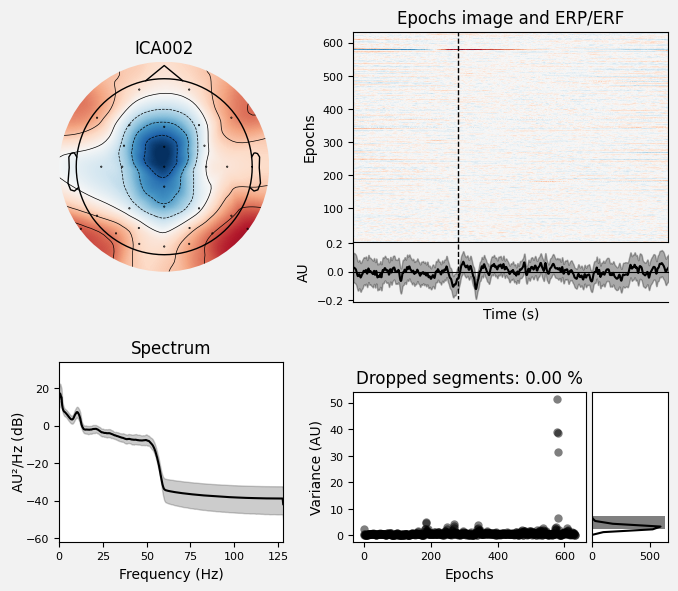

[<Figure size 700x600 with 6 Axes>, <Figure size 700x600 with 6 Axes>]

In [ ]:
# set up and fit the ICA
ica = mne.preprocessing.ICA(n_components=20, random_state=97, max_iter=800)
ica.fit(raw)
ica.exclude = [1, 2]  # details on how we picked these are omitted here
ica.plot_properties(raw, picks=ica.exclude)

Fitted sphere radius:         85.0 mm
Origin head coordinates:      -0.0 -0.0 0.0 mm
Origin device coordinates:    -0.0 -0.0 0.0 mm


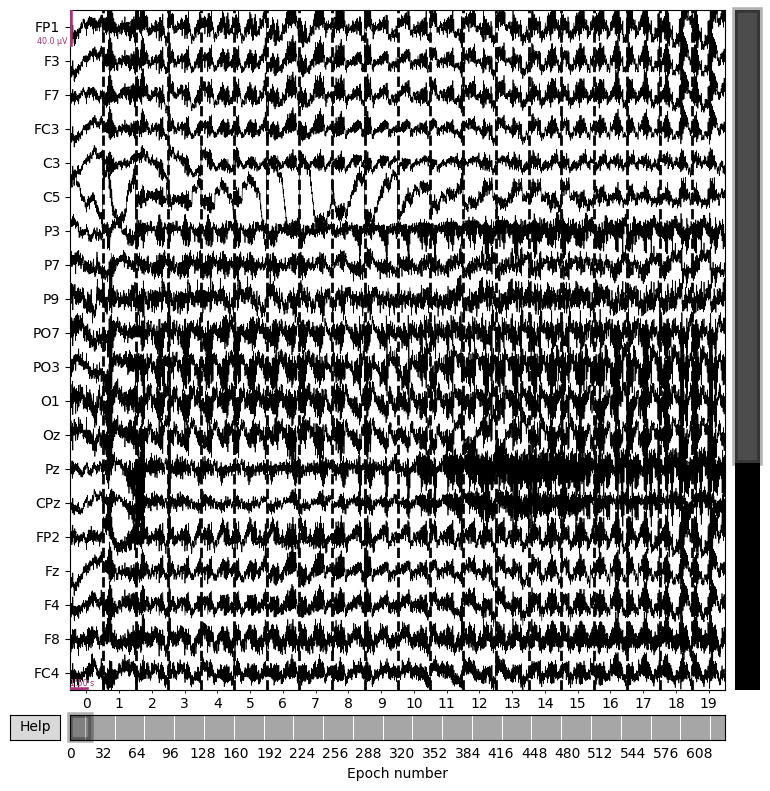

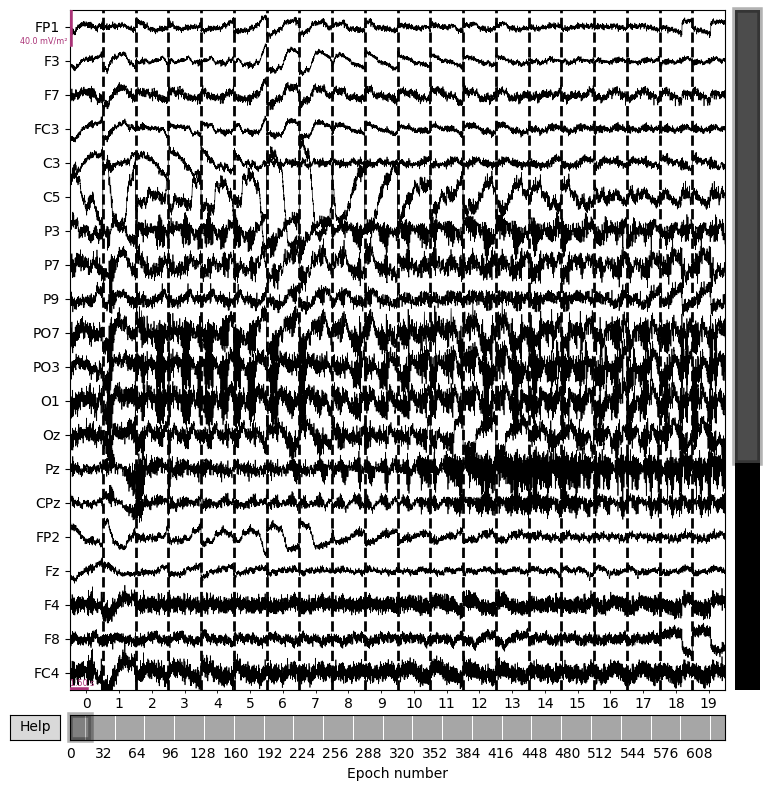

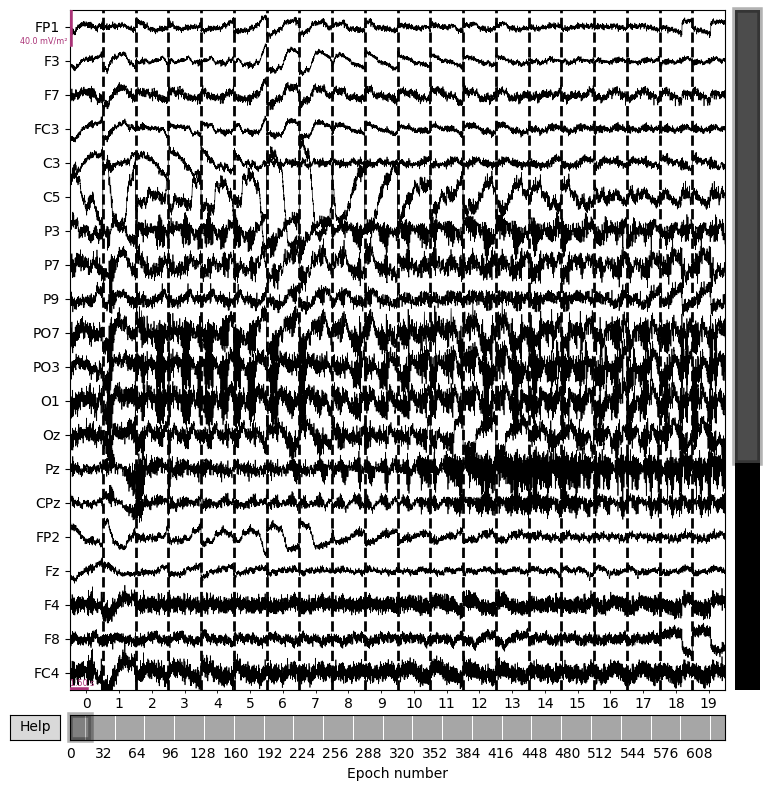

In [ ]:
raw_csd = mne.preprocessing.compute_current_source_density(raw)
raw.plot()
raw_csd.plot()

In [ ]:
# cond = raw.get_condition(raw, None)

AttributeError: ignored

In [ ]:
!pip uninstall mne

In [ ]:
!pip install mneflow

  Using cached mneflow-0.4.0-py3-none-any.whl (30 kB)
  Using cached mne-1.6.0-py3-none-any.whl (8.3 MB)
  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
!pip install tensorflow>=2.1.0

In [ ]:
!pip install git+https://github.com/zubara/mneflow.git

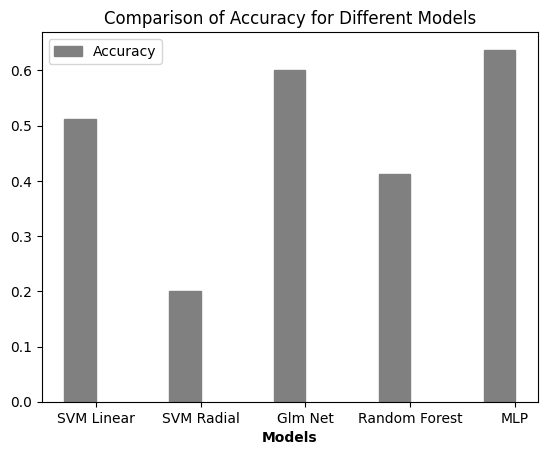

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


models = ['SVM Linear', 'SVM Radial', 'Glm Net', 'Random Forest', 'MLP']
accuracy = [0.5125, 0.2, 0.6 , 0.4125, 0.6375]  # Replace with your accuracy values
#kappa = [0.025, -0.6, 0.2, -0.175, 0.05]  # Replace with your kappa values
barWidth = 0.3
r1 = np.arange(len(accuracy))
r2 = [x + barWidth for x in r1]
plt.bar(r1, accuracy, color='gray', width=barWidth, edgecolor='grey', label='Accuracy')
#plt.bar(r2, kappa, color='black', width=barWidth, edgecolor='grey', label='Kappa')
plt.xlabel('Models', fontweight='bold')
plt.xticks([r + barWidth/2 for r in range(len(accuracy))], models)
#plt.ylabel('Accuracy')
plt.title('Comparison of Accuracy for Different Models')
plt.legend()
plt.show()


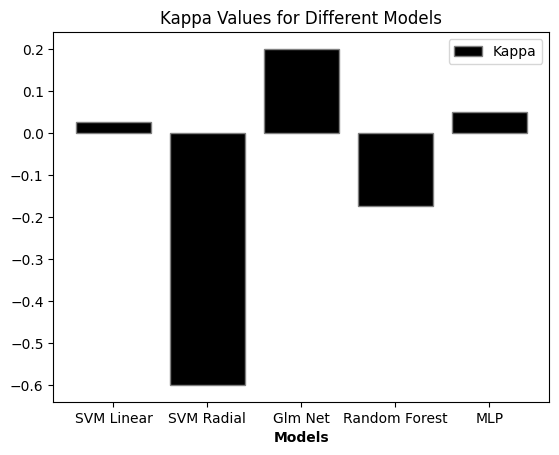

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data Preparation
models = ['SVM Linear', 'SVM Radial', 'Glm Net', 'Random Forest', 'MLP']
#accuracy = [0.5125, 0.2, 0.6 , 0.4125, 0.525]  # Replace with your accuracy values
kappa = [0.025, -0.6, 0.2, -0.175, 0.05]  # Replace with your kappa values

# Bar positions
r = np.arange(len(kappa))

# Creating the bar plot
plt.bar(r, kappa, color='black', edgecolor='grey', label='Kappa')

# Adding labels and title
plt.xlabel('Models', fontweight='bold')
plt.xticks(r, models)
#plt.ylabel('Kappa number')
plt.title('Kappa Values for Different Models')
plt.legend()

# Show the plot
plt.show()


In [19]:
import pandas as pd

Feature_Matrix = pd.read_csv('/content/Feature_matrix.csv')

In [30]:
!pip install pandas openpyxl
import pandas as pd

# Load an Excel file into a pandas DataFrame
df = pd.read_excel('/content/Participant_Demographics.xlsx', engine='openpyxl')

# Display the first few rows of the DataFrame
print(df.head())

   Stimulus  SubID  Age Sex Handedness
0         0      1   20   M      right
1         0      2   24   F      right
2         0      3   18   F      right
3         0      4   21   F      right
4         0      5   23   M      right


In [36]:
import pandas as pd
import numpy as np

# Assuming 'data' is your existing DataFrame
df['Avg_erp'] = np.nan  # Initialize with NaNs

# Display the DataFrame to verify the new column
print(df.head())

   Stimulus  SubID  Age Sex Handedness  Avg_erp
0         0      1   20   M      right      NaN
1         0      2   24   F      right      NaN
2         0      3   18   F      right      NaN
3         0      4   21   F      right      NaN
4         0      5   23   M      right      NaN


In [32]:
Feature_Matrix[0:61].mean()

name_0_label_0_     0.445032
name_0_label_1_     0.387678
name_1_label_0_     0.939637
name_1_label_1_     1.150835
name_2_label_0_     1.173007
                      ...   
name_37_label_1_    0.694768
name_38_label_0_    1.131441
name_38_label_1_    1.239374
name_39_label_0_    0.924020
name_39_label_1_    0.778368
Length: 80, dtype: float64

In [43]:
#new_col = np.array([])
for i in range(1,81,2):

  a = Feature_Matrix[0:61].mean()[i]
  new_col = np.append(new_col , a)

In [48]:
df['Avg_erp'] = new_col

In [49]:
df

Stimulus  SubID  Age Sex Handedness   Avg_erp
0          0      1   20   M      right  0.445032
1          0      2   24   F      right  0.939637
2          0      3   18   F      right  1.173007
3          0      4   21   F      right  0.448274
4          0      5   23   M      right  0.601864
..       ...    ...  ...  ..        ...       ...
75         1     36   19   F      right  1.144985
76         1     37   22   F      right  0.679796
77         1     38   19   F      right  0.694768
78         1     39   21   F      right  1.239374
79         1     40   21   M      right  0.778368

[80 rows x 6 columns]

In [50]:
import pandas as pd

# Assuming 'data' is your DataFrame
df.to_csv('/content/gdrive/MyDrive/EEG/New/stat.csv', index=False)